## Spatial thermalization and setting velocities

We can exploit the fact that the $\alpha$ transition probabilities depend only on the temperature to thermalize the particle positions before we worry about the velocities. Since the potential energy will already be already at equilibrium, we can distribute the particle velocities to get our desired temperature without having to worry about energy "leaking" from kinetic to potential form.

In [2]:
import Gadfly
include("../common/md/md.jl")

thermalize (generic function with 1 method)

Loading trial from q1/q.mdv... done.


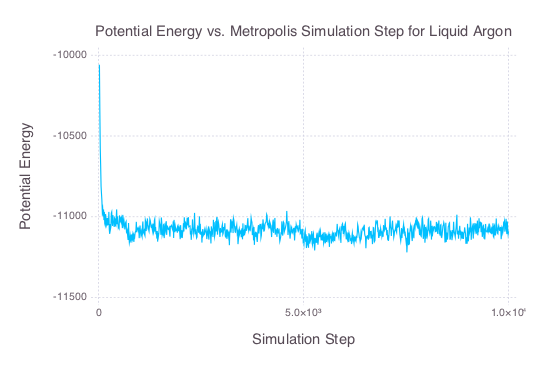

In [5]:
q = loadmdtrial("q1/q.mdv");
q_pe = Gadfly.plot( x=[10:10:10000], y=q.pet[10:10:10000], Gadfly.Geom.line,
Gadfly.Guide.xlabel("Simulation Step"), Gadfly.Guide.ylabel("Potential Energy"),
Gadfly.Guide.title("Potential Energy vs. Metropolis Simulation Step for Liquid Argon"))

true

## Repeat measurements from Problem Set 2

__Reproduce the values for _pressure_ and _internal energy_ given in Verlet's paper (Table 1).__

Record values needed to determine the pressure via the virial theorem _(i.e. the __temperature__ and __virial__)_.

Determine the ___velocity distribution___ of the particles.

Make sure it all matches Verlet's results.

## Include statistical error for results

i.e. $\sigma_{T}$ for the measured internal energy and, using Jacknife analysis, $\sigma_{P}$ for the pressure. Meaure the autocorrelation time for each relevant quantity and use it to determine binsize in the Jacknife analysis.

## 2. Cluster Algorithm for the 2d Ising Model

The source code is in Julia. The random number generator is the Mersenne Twister rather than rand3.C. The algorithm is a modified version of cluster.C, with the (formerly constant) flip probability replaced by the formula

$$
  p = 1 - e^{-2J/T}.
$$

The plots below show magnetization vs. temperature at various values of external magnetic field. In each case, several different grid sizes are used in order to guage the effect of finite lattice size on magnetization.

In [10]:
include("configure.jl")

steps = 20000 => 20000
Critical temperature Tc = 2.269185280793525
Importing Gadfly... done.


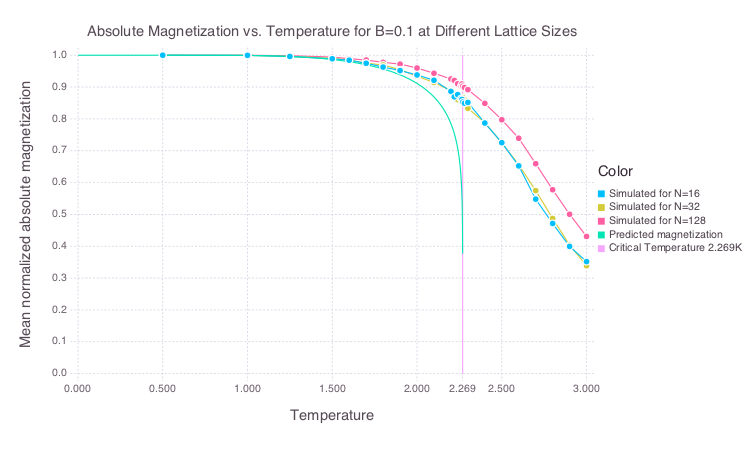

In [15]:
plots[5]

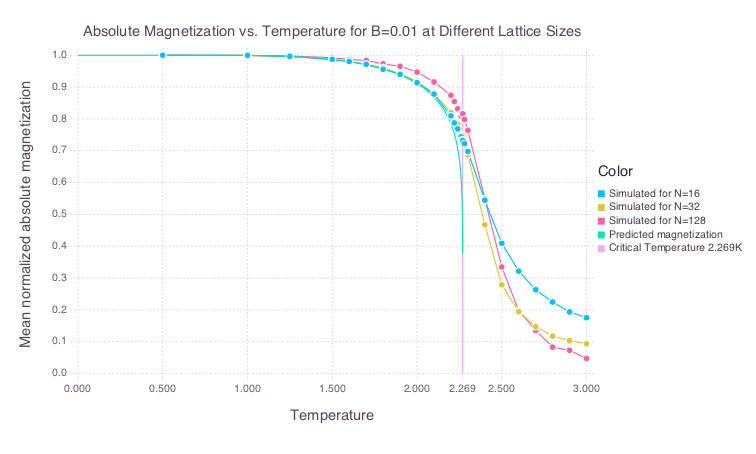

In [14]:
plots[4]

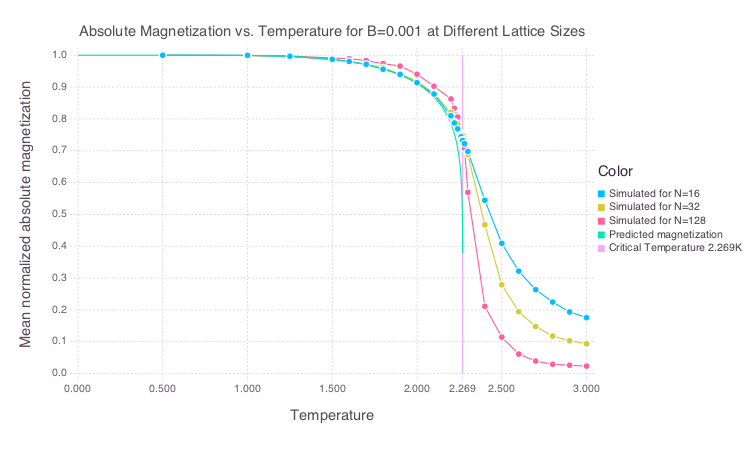

In [13]:
plots[3]

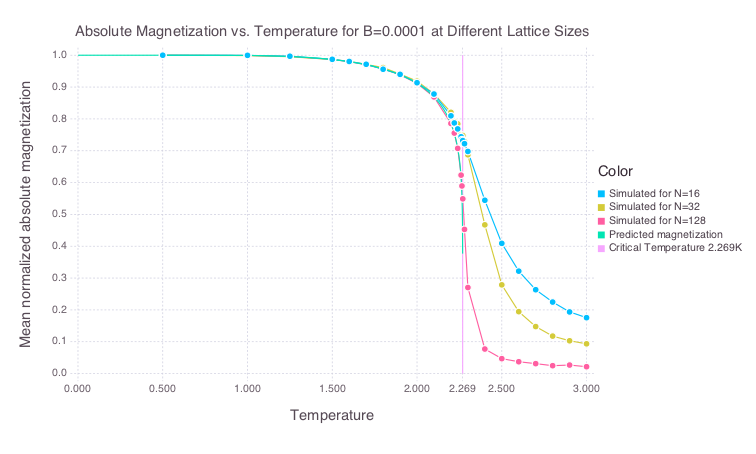

In [12]:
plots[2]

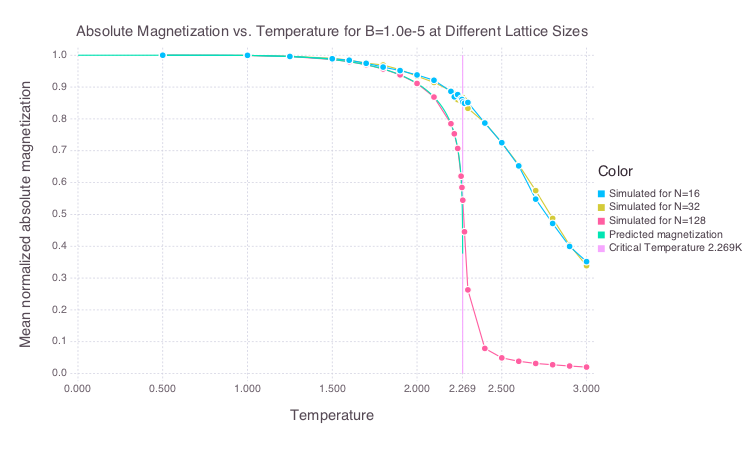

In [11]:
plots[1]

The dependence of the simulation's accuracy on both grid size and external field is made extremely clear. For the smallest external field $B=0.00001$, on a $128 \times 128$ lattice, the simulated results are quite remarkably close to the theoretical prediction.

The simulation results for very weak fields are clearly in agreement with the predicted values, with no noticeable divergence at temperatures of up to 2.265K (for reference, the critical temperature, for our chosen interaction energy, $J = 1K$, is just over 2.269K). Further improvements for temperatures approaching $ T_{C} $ are possible given larger lattices and longer thermalization times (see below), but a 128 x 128 square lattice with N=20,000 trials were in excellent agreement with predicted values for temperatures not exceedingly close to $ T_{C} $. Perhaps more importantly, the range of $ T $ values over which the simulation was innacurate shrank monotonically in the large volume limit.

Small latices $(n=16)$ behaved well, showing excellent agreement with the predicted magnetization at temperatures of up to 2.2K.

Using larger lattices for the simulations proved helpful. At $T = 2.269K, B = 0.001$ (where the simulation for $n = 16$ diverged most greatly from the predicted magnetization), increases in lattice size led directly to improved correspondence between theory and simulation:

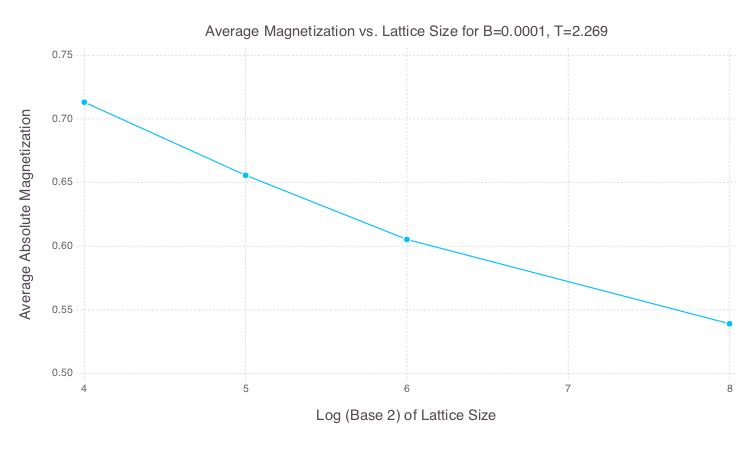

In [21]:
Gadfly.plot(Gadfly.Guide.title("Average Magnetization vs. Lattice Size for B=0.0001, T=2.269"),
Gadfly.Guide.xlabel("Log (Base 2) of Lattice Size"),
Gadfly.Guide.ylabel("Average Absolute Magnetization"),
x=[4,5,6,8], y=[0.7131, 0.6557, 0.6053, 0.5391], Gadfly.Geom.point, Gadfly.Geom.line)

For reference, the theoretically predicted magnetization for T=2.269, B=0, n approaches infinity is given by

$$
  \bigg(1 - {sinh}^{-4}\bigg(\frac{2J}{T}\bigg) \bigg)^{1/8}
$$

which equals 0.3769:

In [11]:
M(2.269,1)

0.376889226422019

Clearly, the entire phase-space has been poorly explored; the Magnetization histogram should be perfectly symmetrical in the large-N limit. Smaller lattices displayed symmetrical histograms for N=20,000, suggesting that more thermalization time is needed at n=256.

## 3. Correlations

For starters, compute $\langle \sigma ( \vec{x} ) \sigma ( \vec{y} ) \rangle$ where $\vec{x} - \vec{y} \in \{m\hat{x}, m\hat{y}\}$ for each step in a trial and save the output.

Call the correlator distance $ d \equiv | \vec{x} - \vec{y} | $. Call the correlator $ C(d) $. Apparently,

$$
  C(d) \approx e^{-\frac{d}{a(T)}}.
$$

We can interpret C(d) to be the probability density function for how far a cluster will extend in any given direction. It's expected value, $a(T)$, should be a decent estimator of cluster radius. We can solve for $a(T)$:

$$
  a(T) = - \frac{d}{ln(C(d))}
$$

So 

In [1]:
cormeans = readdlm("cormeans")
corstddevs = readdlm("corstddevs")

12x6 Array{Float64,2}:
 0.127408  0.14285   0.174526  0.171257  0.176483  0.177006
 0.188437  0.222585  0.274781  0.266979  0.27768   0.28662 
 0.225252  0.273624  0.341525  0.33211   0.346307  0.35716 
 0.247206  0.309849  0.389606  0.378713  0.396306  0.412279
 0.260388  0.334617  0.429037  0.414506  0.431657  0.450045
 0.268983  0.351746  0.454688  0.437723  0.456868  0.475263
 0.273527  0.362858  0.468915  0.452025  0.474897  0.494318
 0.277012  0.367603  0.475148  0.45954   0.482506  0.504011
 0.273527  0.362858  0.468915  0.452025  0.474897  0.494318
 0.268983  0.351746  0.454688  0.437723  0.456868  0.475263
 0.260388  0.334617  0.429037  0.414506  0.431657  0.450045
 0.247206  0.309849  0.389606  0.378713  0.396306  0.412279